In [58]:
# imports
import torch 
import torch.nn as nn 
from torch.autograd import Variable
import torch.utils.data as data 
import torchvision
import matplotlib.pyplot as plt

print("pytorch version is {}".format(torch.__version__))
print("pytorchvision version is {}".format(torchvision.__version__))


pytorch version is 1.6.0
pytorchvision version is 0.7.0


In [59]:
# set the seed for reproducibility
torch.manual_seed(123)

In [87]:
# define the hyperparameters
EPOCHS = 1
BATCH_SIZE = 50
LEARNING_RATE = 0.001
NUM_CLASSES=10

In [61]:
# get the mnist digits data
train_data = torchvision.datasets.MNIST(
    root='/home/javaprog/Data/Personal/Scratch',
    train = True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)
print("the trainign data is of type {}".format(type(train_data)))


the trainign data is of type <class 'torchvision.datasets.mnist.MNIST'>


In [62]:
# get information on the training data
train_X = train_data.train_data
train_y = train_data.train_labels
print("the training features are of type {} and shape {}".format(type(train_X), train_X.shape))
print("the training labels are of type {} and shape {}".format(type(train_y), train_y.shape))


the training features are of type <class 'torch.Tensor'> and shape torch.Size([60000, 28, 28])
the training labels are of type <class 'torch.Tensor'> and shape torch.Size([60000])


<function matplotlib.pyplot.show(close=None, block=None)>

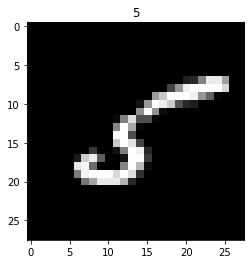

In [63]:
# display one the numbers
index = 11
plt.imshow(train_X[index].numpy(), cmap='gray')
plt.title(train_y[index].item())
plt.show


In [64]:
# build a data loader for training
# shape of input tensor will be (batch_size, 1 grayscale channel, 28, 28)
train_loader = data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
print("the data loader is of type {}".format(type(train_loader)))

the data loader is of type <class 'torch.utils.data.dataloader.DataLoader'>


In [65]:
# get the test data
test_data = torchvision.datasets.MNIST(root='/home/javaprog/Data/Personal/Scratch', train=False, transform=torchvision.transforms.ToTensor)
test_X = torch.unsqueeze(test_data.test_data, dim=1)
test_y = test_data.test_labels
print("the test features are of type {} and shape {}".format(type(test_X), test_X.shape))
print("the test labels are of type {} and shape {}".format(type(test_y), test_y.shape))


the test features are of type <class 'torch.Tensor'> and shape torch.Size([10000, 1, 28, 28])
the test labels are of type <class 'torch.Tensor'> and shape torch.Size([10000])


In [66]:
# define the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_01_input = nn.Sequential (
            nn.Conv2d(
                in_channels=1,   # the one grayscale channel
                out_channels=16,  # will output 6 channels
                kernel_size=5,   # the size of the moving filter
                stride=1,        # how much the filter moves by step
                padding=2
            ),                   # output will be (16, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),     # height and width reduced by factor of 2, output will be (16, 14, 14)
        )
        self.conv_02 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,   # the 16 channels from the previous layer
                out_channels=32,  # will output 32 channels
                kernel_size=5,   # the size of the moving filter
                stride=1,        # how much the filter moves by step
                padding=2
            ),                   # output will be (32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),     # height and width reduced by factor of 2, output will be (32, 7, 7)
        )
        self.flatten_01 = nn.Flatten(start_dim=1)
        self.linear_01_output = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv_01_input(x)
        x = self.conv_02(x)
        x = self.flatten_01(x)
        x = self.linear_01_output(x)

        # return
        return x




In [72]:
# model class
class CnnModelWorking(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.conv_01_input = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.maxpool2d_01 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_02 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.maxpool2d_02 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.linear_01 = nn.Linear(in_features=12*4*4, out_features=120)
        self.linear_02 = nn.Linear(in_features=120, out_features=60)
        self.linear_03_output = nn.Linear(in_features=60, out_features=output_size)

        self.relu = nn.ReLU()
        self.flatten_01 = nn.Flatten(start_dim=1)

    def forward(self, x):
        # first convolution
        x = self.conv_01_input(x.float())
        x = self.relu(x)
        x = self.maxpool2d_01(x)

        # second convolution
        x = self.conv_02(x.float())
        x = self.relu(x)
        x = self.maxpool2d_02(x)

        # flatten for linear
        x = self.flatten_01(x)

        # linear layers with relu
        x = self.linear_01(x)
        x = self.relu(x)
        x = self.linear_02(x)
        x = self.relu(x)
        x = self.linear_03_output(x)

        # return
        return x



In [109]:
# model class
# best model with more filters and 0,001 learning rate
class CnnModel(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.conv_01_input = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)
        self.maxpool2d_01 = nn.MaxPool2d(kernel_size=2)
        self.conv_02 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)
        self.maxpool2d_02 = nn.MaxPool2d(kernel_size=2)

        # self.linear_01 = nn.Linear(in_features=12*4*4, out_features=120)
        self.linear_01 = nn.Linear(in_features=32*7*7, out_features=120)
        self.linear_02 = nn.Linear(in_features=120, out_features=60)
        self.linear_03_output = nn.Linear(in_features=60, out_features=output_size)

        self.relu = nn.ReLU()
        self.flatten_01 = nn.Flatten(start_dim=1)

    def forward(self, x):
        # first convolution
        x = self.conv_01_input(x.float())
        x = self.relu(x)
        x = self.maxpool2d_01(x)

        # second convolution
        x = self.conv_02(x.float())
        x = self.relu(x)
        x = self.maxpool2d_02(x)

        # flatten for linear
        x = self.flatten_01(x)

        # linear layers with relu
        x = self.linear_01(x)
        x = self.relu(x)
        x = self.linear_02(x)
        x = self.relu(x)
        x = self.linear_03_output(x)

        # return
        return x



In [110]:
# instatiate the network
model = CnnModel(output_size=NUM_CLASSES)
# model = CNN()
print("the model is \n{}".format(model))

the model is 
CnnModel(
  (conv_01_input): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2d_01): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_02): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2d_02): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_01): Linear(in_features=1568, out_features=120, bias=True)
  (linear_02): Linear(in_features=120, out_features=60, bias=True)
  (linear_03_output): Linear(in_features=60, out_features=10, bias=True)
  (relu): ReLU()
  (flatten_01): Flatten()
)


In [111]:
# get the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss = nn.CrossEntropyLoss()

In [112]:
# train the model
for epoch in range(EPOCHS):
    for step, (x, y) in enumerate(train_loader):
        # x = torch.unsqueeze(x, dim=1)
        # print("the stept {} x is of type {} and shape {} and requires grad {}".format(step, type(x), x.shape, x.requires_grad))
        prediction = model(x)
        step_loss = loss(prediction, y)
        optimizer.zero_grad()
        step_loss.backward()
        optimizer.step()

        # print progress
        if step % 100 == 0:
            test_prediction = model(test_X)
            label_prediction = torch.max(test_prediction, 1)[1].data.squeeze
            accuracy = 0
            # accuracy = (label_prediction == test_y).sum().item() / float(test_y.size(0))
            print("epoch: {} with train loss {:.4f} and accuracy {:.4f}".format(epoch, step_loss.item(), accuracy))            

epoch: 0 with train loss 2.3018 and accuracy 0.0000
epoch: 0 with train loss 0.3761 and accuracy 0.0000
epoch: 0 with train loss 0.4820 and accuracy 0.0000
epoch: 0 with train loss 0.3196 and accuracy 0.0000
epoch: 0 with train loss 0.0418 and accuracy 0.0000
epoch: 0 with train loss 0.1140 and accuracy 0.0000
epoch: 0 with train loss 0.0964 and accuracy 0.0000
epoch: 0 with train loss 0.0605 and accuracy 0.0000
epoch: 0 with train loss 0.0462 and accuracy 0.0000
epoch: 0 with train loss 0.0687 and accuracy 0.0000
epoch: 0 with train loss 0.0248 and accuracy 0.0000
epoch: 0 with train loss 0.0067 and accuracy 0.0000


In [113]:
# train the model
for epoch in range(EPOCHS):
    for step, (x, y) in enumerate(train_loader):
        if step % 1000 == 0:
            print("the stept {} x is of type {} and shape {} and requires grad {}".format(step, type(x), x.shape, x.requires_grad))
            print("the y is of type {} and shape {}".format(type(y), y.shape))

the stept 0 x is of type <class 'torch.Tensor'> and shape torch.Size([50, 1, 28, 28]) and requires grad False
the y is of type <class 'torch.Tensor'> and shape torch.Size([50])
the stept 1000 x is of type <class 'torch.Tensor'> and shape torch.Size([50, 1, 28, 28]) and requires grad False
the y is of type <class 'torch.Tensor'> and shape torch.Size([50])
